In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [83]:
##REad the dataset
df=pd.read_csv('height-weight.csv')

In [84]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

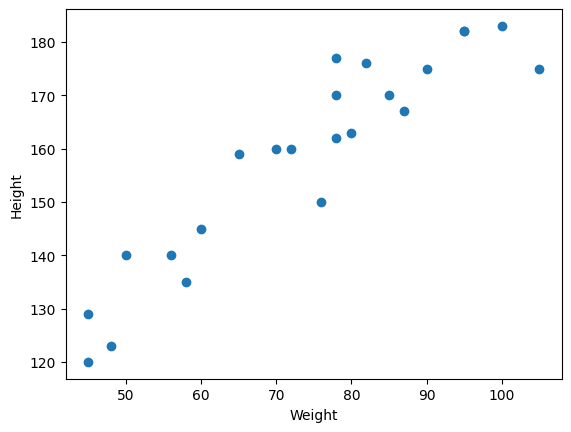

In [85]:
## scatter plot

plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [86]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [7]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 266.2/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
## seaborn for visualization
import seaborn as sns


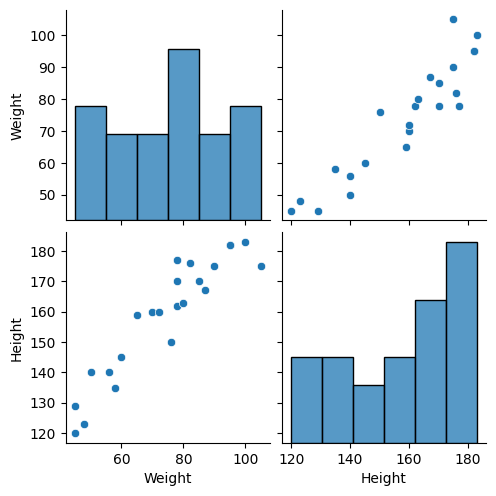

In [9]:
sns.pairplot(df)

In [98]:
## Independent and dependent features
 ### independt features should be data frame or 2 dimensional array

X=df[['Weight']] # [[]] gives the dataframe instead of series
np.array(x).shape

(23, 1)

In [89]:
 #X_series=df['Weight']
 #np.array(X).shape # we will see why we dont use series for regression

In [99]:
# Dependent features can be in series as we have only one dependent features
y=df['Height'] ## this variable can be series or 1 d array

In [100]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [24]:
pip install scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 495.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.9 MB 939.4 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.9 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.4/10.9 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.9 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.9 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.9 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.9 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/10.9 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/10.9 MB 2.0 MB/s eta 0:00:05
   --- ----------

In [92]:
import sklearn

In [93]:
## Train Test split
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [102]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [103]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [104]:
X_train.shape # 1 indicate the number of features currently we have one

(18, 1)

In [105]:
X_test.shape

(5, 1)

In [106]:
## Standardization (generally applied only on independent features)
from sklearn.preprocessing import StandardScaler





In [107]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [108]:
X_test=scaler.transform(X_test) # here we use transform method instead of fit_transform because want to prevent data leakage
# here the mean and standard deviation is used of the X_test to calculate z score

In [109]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [110]:
regression=LinearRegression() #n_jobs=-1 means runs all the processor for this 


In [46]:
regression.fit(X_series,y_train) # see the error

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [111]:
type(X_train)

numpy.ndarray

In [112]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [113]:
X_train.shape

(18, 1)

In [114]:
regression.fit(X_train,y_train)

LinearRegression()

In [115]:
print("Cofficent or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Cofficent or slope: [17.03440872]
Intercept: 157.5


In [116]:
y_pred_train=regression.predict(X_train)

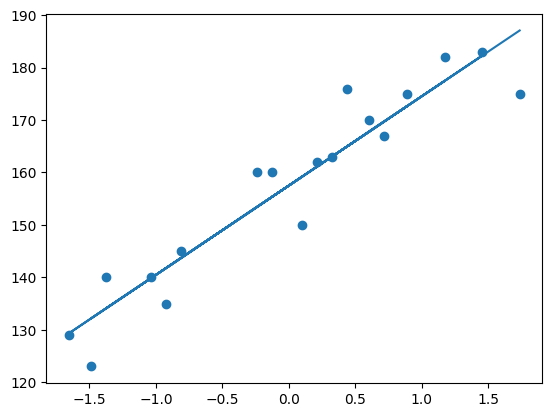

In [117]:
## plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train) # best fitting line

## prediction of test data
1.predicted height output=intercept+coef_(Weights)

2.y_pred=156.470+17.29(X_test)

In [118]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [119]:
## Prediction for test data
y_pred=regression.predict(X_test)

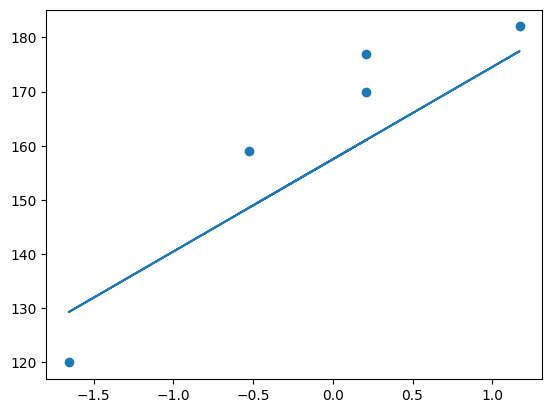

In [120]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [121]:
## Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [122]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


109.77592599051664
9.822657814519232
10.477400726827081


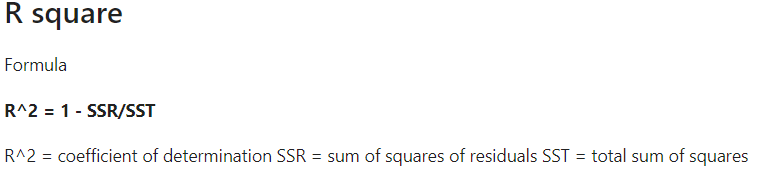

In [123]:
from sklearn.metrics import r2_score

In [125]:
score=r2_score(y_test,y_pred)
print(score)

0.776986986042344


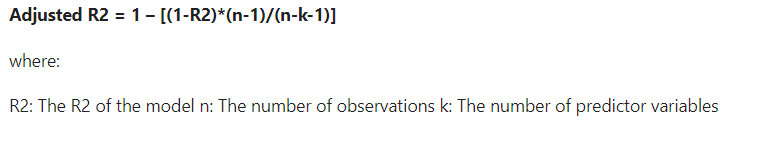

In [127]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.7026493147231252

In [131]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 393.8 kB/s eta 0:00:25
    --------------------------------------- 0.1/9.8 MB 798.9 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.8 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.8 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.8 MB 2.0 MB/s eta 0:00:05
   ---- --------------------

In [132]:
## ols linear Regression
import statsmodels.api as sm

In [133]:
model=sm.OLS(y_train,X_train).fit()

In [134]:
prediction=model.predict(X_test)
print(prediction)

[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [135]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Thu, 13 Jun 2024   Prob (F-statistic):                       0.661
Time:                        12:07:41   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\ashish\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [136]:
regression.coef_

array([17.03440872])

In [138]:
## Prediction for new data
regression.predict([[72]]) # we get this huge value of height because we dont standarise it

array([1383.97742777])

In [141]:
# after standarise
print(regression.predict(scaler.transform([[72]])))

[155.30639545]


d:\ML_WHOLE\myVenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
